In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("concrete_data.csv")

In [3]:
df.head(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [4]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [5]:
for i in df.columns:
    print(f"{i} : {df[i].dtype}")

cement : float64
blast_furnace_slag : float64
fly_ash : float64
water : float64
superplasticizer : float64
coarse_aggregate : float64
fine_aggregate  : float64
age : int64
concrete_compressive_strength : float64


In [6]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [8]:
import seaborn as sns

<Axes: >

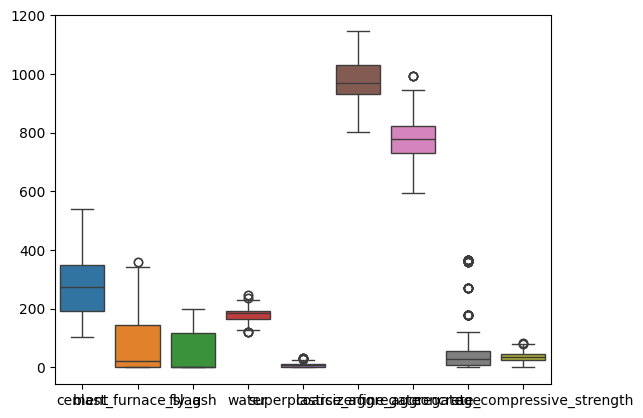

In [10]:
sns.boxplot(df)

<Axes: xlabel='blast_furnace_slag', ylabel='Count'>

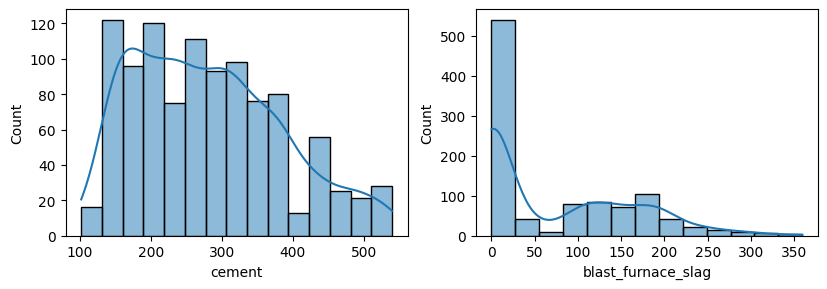

In [15]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.histplot(df['cement'],kde=True)
plt.subplot(3,3,2)
sns.histplot(df['blast_furnace_slag'],kde=True)

In [17]:
df.corr(method="spearman")

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.245167,-0.418320,-0.094437,0.037919,-0.144880,-0.173596,0.004640,0.477614
blast_furnace_slag,-0.245167,1.000000,-0.253551,0.053360,0.098137,-0.348898,-0.302278,-0.017581,0.164105
fly_ash,-0.418320,-0.253551,1.000000,-0.283150,0.454091,0.058366,0.051307,0.002801,-0.077830
water,-0.094437,0.053360,-0.283150,1.000000,-0.686923,-0.218487,-0.345614,0.090942,-0.308414
superplasticizer,0.037919,0.098137,0.454091,-0.686923,1.000000,-0.198802,0.168313,-0.009525,0.347786
coarse_aggregate,-0.144880,-0.348898,0.058366,-0.218487,-0.198802,1.000000,-0.100480,-0.044928,-0.183542
fine_aggregate,-0.173596,-0.302278,0.051307,-0.345614,0.168313,-0.100480,1.000000,-0.057362,-0.179962
age,0.004640,-0.017581,0.002801,0.090942,-0.009525,-0.044928,-0.057362,1.000000,0.596028
concrete_compressive_strength,0.477614,0.164105,-0.077830,-0.308414,0.347786,-0.183542,-0.179962,0.596028,1.000000


In [18]:
df['cement'].std()

104.50636449481532

In [19]:
for i in df.columns:
    print(i,df[i].std())

cement 104.50636449481532
blast_furnace_slag 86.27934174810584
fly_ash 63.99700415268765
water 21.35421856503247
superplasticizer 5.97384139248552
coarse_aggregate 77.75395396672077
fine_aggregate  80.17598014240437
age 63.16991158103249
concrete_compressive_strength 16.705741961912512


In [20]:
from sklearn.preprocessing import StandardScaler

In [22]:
from sklearn.model_selection import train_test_split
traindf,testdf=train_test_split(df,test_size=0.15,random_state=55)
traindf.shape,testdf.shape

((875, 9), (155, 9))

In [23]:
input_train_df=traindf.drop(columns='concrete_compressive_strength',axis=1)
target_train_df=traindf['concrete_compressive_strength']
input_test_df = testdf.drop(columns='concrete_compressive_strength',axis=1)
target_test_df = testdf['concrete_compressive_strength']

In [25]:
scaler=StandardScaler()
input_train_array=scaler.fit_transform(input_train_df)
input_test_array = scaler.transform(input_test_df)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr=LinearRegression()
lr.fit(input_train_array,target_train_df)

LinearRegression()

In [29]:
predicted=lr.predict(input_test_array)

In [30]:
from sklearn.metrics import r2_score
r2_score(target_test_df,predicted)

0.5241330648129034

In [32]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(input_train_array,target_train_df)

DecisionTreeRegressor()

In [34]:
dt_predicted=dt.predict(input_test_array)
r2_score(target_test_df,dt_predicted)

0.8860449777171424